In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import scanpy as sc
import lineagevi
import scvelo as scv
import numpy as np

In [52]:
adata_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/adata_with_velocity.h5ad'
adata = sc.read_h5ad(adata_path)

In [57]:
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/vae_velocity_model.pt'

linvi = lineagevi.utils.load_model(
    adata,
    model_path=model_path,
    map_location='cpu',
    n_hidden=128,
    training=False
)


In [58]:
linvi.get_model_outputs(adata, n_samples=10, save_to_adata=True)

computing velocity graph (using 1/10 cores)
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


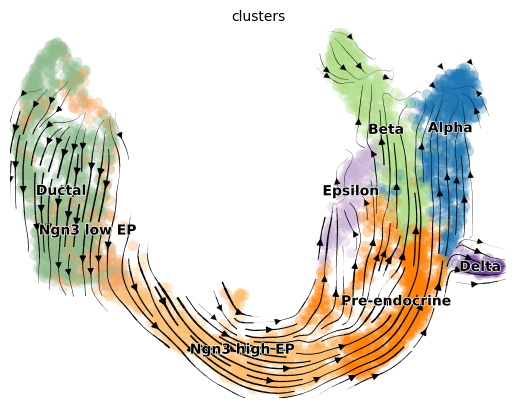

In [59]:
sc.pp.neighbors(adata, use_rep='X_pca')
scv.tl.velocity_graph(adata, vkey='velocity', xkey='Ms')
scv.pl.velocity_embedding_stream(adata, vkey='velocity', color='clusters')

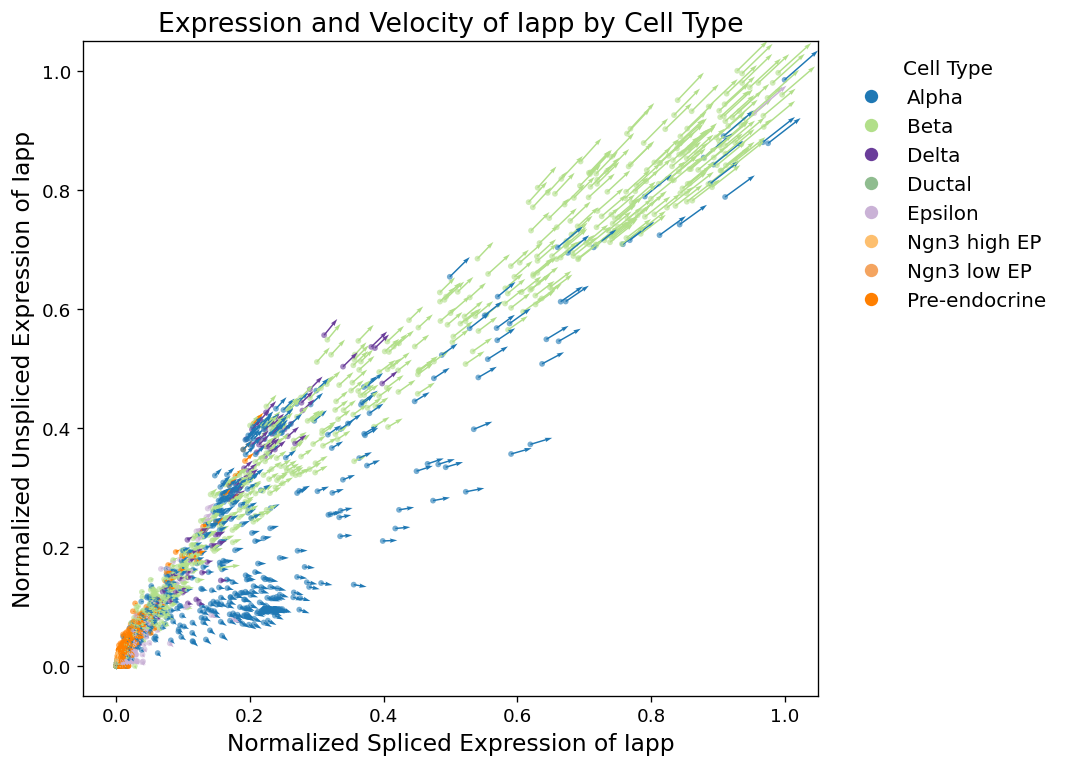

(<Figure size 1080x780 with 1 Axes>,
 <Axes: title={'center': 'Expression and Velocity of Iapp by Cell Type'}, xlabel='Normalized Spliced Expression of Iapp', ylabel='Normalized Unspliced Expression of Iapp'>)

In [61]:
lineagevi.plots.plot_phase_plane(adata, 'Iapp', u_scale=.05, s_scale=.05, alpha=1, head_width=0.02, head_length=0.03, length_includes_head=False)

In [62]:
adata_gp = linvi.map_velocities(
    adata,
    direction="gp_to_gene",
    n_samples=100,
    scale=10.0,
    velocity_key="gp2gene_velocity",
    return_gp_adata=True
)

computing velocity graph (using 1/10 cores)
    finished (0:00:01) --> added 
    'gp2gene_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'gp2gene_velocity_umap', embedded velocity vectors (adata.obsm)


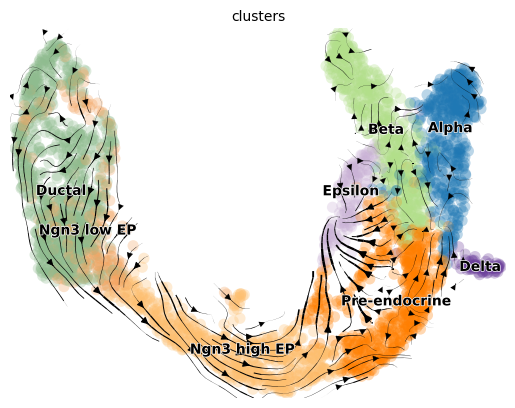

In [65]:
sc.pp.neighbors(adata, use_rep='mean')
scv.tl.velocity_graph(adata, vkey='gp2gene_velocity', xkey='Ms')
scv.pl.velocity_embedding_stream(adata, vkey='gp2gene_velocity', color='clusters')

In [66]:
gp_adata = linvi.map_velocities(
    adata,
    direction="gene_to_gp",
    n_samples=100,
    scale=10.0,
    velocity_key="gene2gp_velocity",
    return_gp_adata=True,
    return_negative_velo=True
)

In [68]:
gp_adata

AnnData object with n_obs × n_vars = 3696 × 647
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'gp2gene_velocity_self_transition', 'gene2gp_velocity_self_transition'
    uns: 'pca', 'neighbors', 'gene2gp_velocity_graph', 'gene2gp_velocity_graph_neg', 'gene2gp_velocity_params', 'clusters_colors'
    obsm: 'X_umap', 'X_pca', 'gene2gp_velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'gene2gp_velocity'
    obsp: 'distances', 'connectivities'

computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'gene2gp_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'gene2gp_velocity_umap', embedded velocity vectors (adata.obsm)


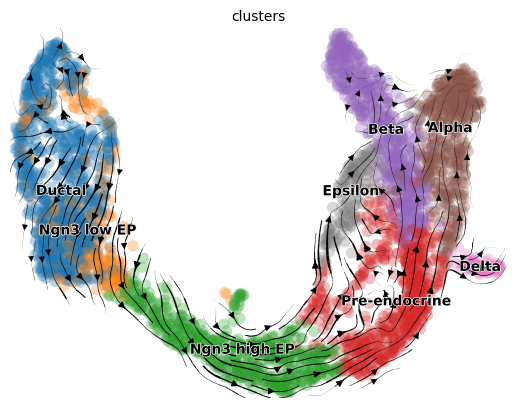

In [70]:
sc.pp.pca(gp_adata)
sc.pp.neighbors(gp_adata)
scv.tl.velocity_graph(gp_adata, vkey='gene2gp_velocity', xkey='Ms')
scv.pl.velocity_embedding_stream(gp_adata, vkey='gene2gp_velocity', color='clusters')